<center><font size=6 color="#00416d">Data Exploration For Classification Problem</font></center>

In this notebook we are going to perform data analyis on Titanic Dataset.

In [36]:
import pandas as pd
import numpy as np

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [110]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

In [38]:
cf.go_offline()

### Data Ingestion

In [39]:
train = pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Info about columns
PassengerId: Passenger ID <br>
Survived: 0 Dead, 1 alive <br>
Pclass: 1 = First class 2 = Second class 3 = Third class <br>
Name: Name of passenger <br>
Sex: Gender <br>
Age: Age of the passenger <br>
SibSp: Number of siblings <br>
Ticket: Ticket number <br>
Fare: Fare of the ticket <br>

<AxesSubplot:xlabel='Survived', ylabel='count'>

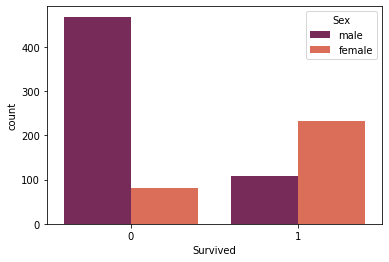

In [41]:
# checking peoople survived based on sex
sns.countplot(data=train, x="Survived", hue="Sex", palette="rocket")

<AxesSubplot:xlabel='Survived', ylabel='count'>

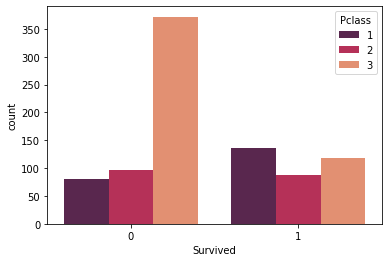

In [42]:
# Checking peoople survived based on Pclass
sns.countplot(data=train, x="Survived", hue="Pclass", palette="rocket")

<AxesSubplot:xlabel='Age', ylabel='Count'>

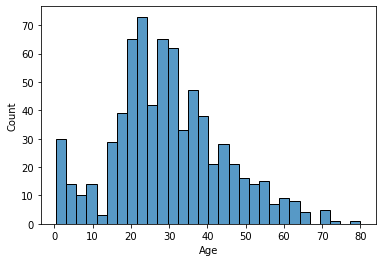

In [43]:
# Checking age distribution
sns.histplot(train["Age"].dropna(), kde=False, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

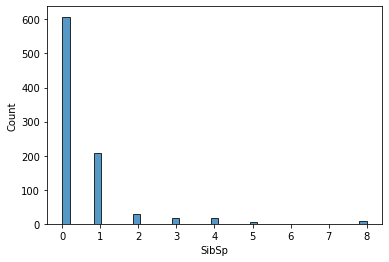

In [44]:
# Will see how many childerns most of the passenger have
sns.histplot(x=train["SibSp"])

In [45]:
# Check fareprice graph
train["Fare"].iplot(kind="hist", bins=50, )

<AxesSubplot:ylabel='Sex'>

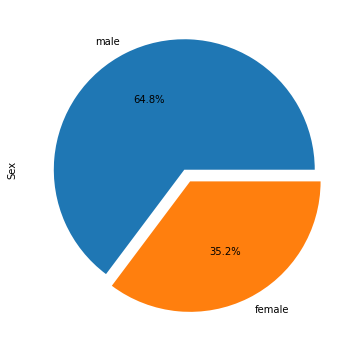

In [46]:
# Check male and female presence on the ship
k = train["Sex"].value_counts()
plt.figure(figsize=(7,6))
k.plot(kind='pie', autopct='%1.1f%%', explode=[0, 0.1])

### Handling Missing Data

<AxesSubplot:>

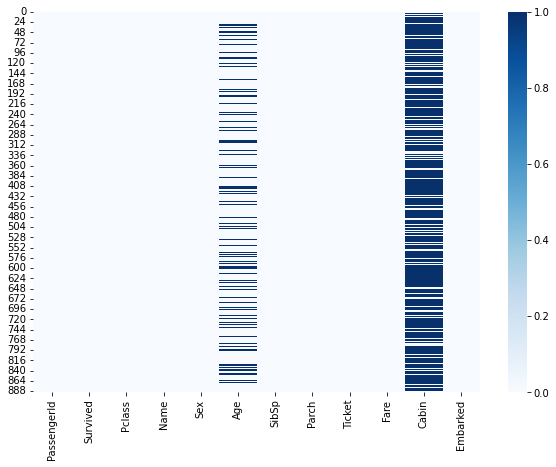

In [47]:
# Checking for null values
plt.figure(figsize=(10, 7))
sns.heatmap(train.isnull().replace([True, False], [1, 0]), cmap="Blues")

In [48]:
train["Age"].isnull().sum()

177

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

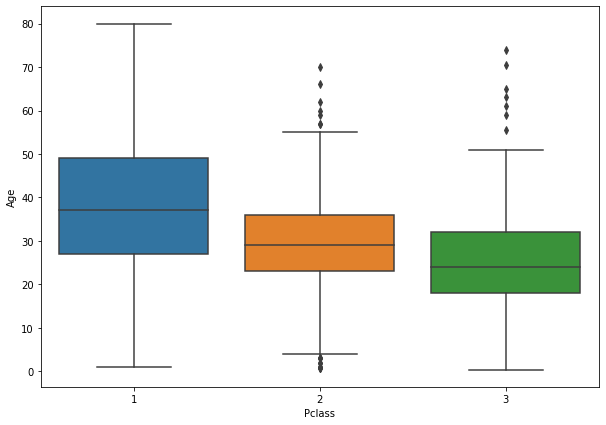

In [49]:
# Checking age of passengers as per their Pclass
plt.figure(figsize=(10, 7))
sns.boxplot(x="Pclass", y="Age", data=train)

In [50]:
train_groups = train.groupby("Pclass")
# train_groups.first() # Check first 3 rows of group by object
train_groups["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [51]:
# We are going to replacing missing age values with average age values taken based on Pclass
def impute_age_values(cols):
    """
    This function replaces missing age values
    cols: Pandas Series : [age, pclass]
    return: int: age
    """
    age = cols.Age
    pclass = cols.Pclass
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [52]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age_values, axis=1)

In [53]:
train["Age"].isnull().sum()

0

<AxesSubplot:>

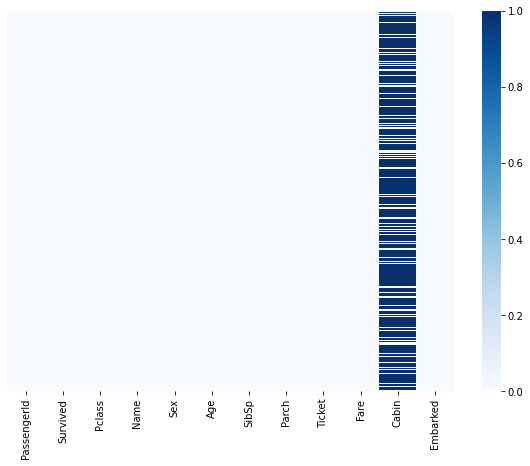

In [54]:
# Checking for null values
plt.figure(figsize=(10, 7))
sns.heatmap(train.isnull().replace([True, False], [1, 0]), cmap="Blues", yticklabels=False)

In [55]:
# There are many none values in "Cabin" column, So we are dropping that column
train.drop("Cabin", axis=1, inplace=True)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [56]:
# We are dropping all other None values from train DataFrame
# train.isnull().sum()
train.dropna(inplace=True)

### Handling Categorical Data

In [57]:
le = LabelEncoder()
embarked = le.fit_transform(train["Embarked"])
train.drop("Embarked", axis=1, inplace=True)
train["Embarked"] = embarked

In [59]:
sex = le.fit_transform(train["Sex"])
train.drop("Sex", axis=1, inplace=True)
train["Sex"] = sex

In [65]:
# Dropping much useful non numerical colums
train.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True, errors="ignore")

In [66]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1


In [73]:
# Creating features(X) and target values(y)
X = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [229]:
# Spliting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [230]:
# Fitting model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train, sample_weight=35)

LogisticRegression()

In [231]:
predictions = logistic_model.predict(X_test)

In [232]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [233]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 31,  73]], dtype=int64)

In [234]:
# Making changes to the model
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train, )

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [235]:
pipe.score(X_test, y_test)

0.8277153558052435

In [236]:
predictions=pipe.predict(X_test)

In [237]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267

